In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import joblib

df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [129]:
col_dim = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]
for col in col_dim:
    df[col] = df[col].map({'yes':1,'no':0})

In [131]:
df = pd.get_dummies(df,columns=["furnishingstatus"],drop_first = True,dtype=int)

In [132]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [162]:
#Define models and hyperparameters
models = {
     'Linear':{
         'model':LinearRegression(),
         'params':{}
     },
    'Ridge':{
        'model':Ridge(),
        'params':{'model__alpha':[0.001,0.01,0.1,1,10]}
    },
    'Lasso':{
        'model':Lasso(),
        'params':{'model__alpha':[0.001,0.01,0.1,1,10]}
    },
    'ElasticNet':{
        'model':ElasticNet(),
        'params':{'model__alpha':[0.001,0.01,0.1,1,10],'model__l1_ratio':[0.2,0.5,0.9]}
    },
    'RandomForestRegressor':{
        'model':RandomForestRegressor(),
        'params':{'model__n_estimators':[100,200],'model__max_depth':[None,20,10]}
    }
    
}

In [175]:
best_models = {}

for name,m in models.items():
    print(f"Tranning:,{name}")

pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('model',m['model'])
])

Tranning:,Linear
Tranning:,Ridge
Tranning:,Lasso
Tranning:,ElasticNet
Tranning:,RandomForestRegressor


In [176]:
grid = GridSearchCV(pipe,m['params'],cv=5,scoring='r2')                  

In [177]:
grid.fit(X_train,y_train)

,estimator,Pipeline(step...Regressor())])
,param_grid,"{'model__max_depth': [None, 20, ...], 'model__n_estimators': [100, 200]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [178]:
y_pred = grid.predict(X_test)

In [180]:
print("MSE",mean_squared_error(y_test,y_pred))
print("R2_score",round(r2_score(y_test,y_pred)*100,2),'%')

MSE 1913447046246.4028
R2_score 62.14 %


In [181]:
best_models[name] = grid.best_estimator_

In [183]:
#save the data
joblib.dump(best_models['RandomForestRegressor'],'best_model.pkl')

['best_model.pkl']

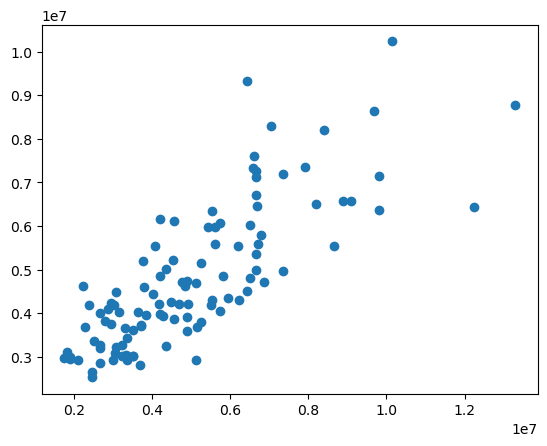

In [185]:
plt.scatter(
    y_test,
    best_models["RandomForestRegressor"].predict(X_test))